### Sentiment analysis (Restaurant Review)

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Text classification (Sentiment Analysis) with KERAS and TFIDF

In [2]:
import pandas as pd

df = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [3]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [4]:
s = 'Hi all, Welcome to sentiment analysis !!...'
s= s.lower()

In [5]:
import re
re.sub("[^a-z ]",'',s).strip()

'hi all welcome to sentiment analysis'

In [6]:
def text_preprocess(st):
    st = st.lower()
    pre = re.sub("[^a-z ]",'',st).strip()
    return pre

In [7]:
text_preprocess('Welcome all ...!!')

'welcome all'

In [8]:
df["Review_pre"] = df['Review'].apply(text_preprocess)

In [9]:
df

,Review,Liked,Review_pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


#### Separate X and Y

In [10]:
X = df['Review_pre']
X.head()

0                                 wow loved this place
1                                    crust is not good
2             not tasty and the texture was just nasty
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
Name: Review_pre, dtype: object

In [11]:
Y = df['Liked']
Y.head()

0    1
1    0
2    0
3    1
4    1
Name: Liked, dtype: int64

### Create TFIDF Vectorizer

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
X_pre = tfidf.fit_transform(X).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Train test split

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [14]:
xtrain.shape

(800, 1831)

In [15]:
xtest.shape

(200, 1831)

### Create Neaural Network

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [17]:
## Create Sequential Model

model = Sequential()

## Add dense layer 
model.add(Dense(units=256,activation='relu',input_dim=xtest.shape[1]))

## Add Dropout layer
model.add(Dropout(0.5))

## Add Hindden layer 2
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.5))
'''
## Hidden layer 3
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(.15))
'''
## Output layer for the Binary Classification
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               468992    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 502017 (1.92 MB)
Trainable params: 502017 (1.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the model

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [21]:
hist = model.fit(xtrain,ytrain,validation_split=0.2,epochs=200,callbacks=early_stop,batch_size=8)

Epoch 1/200


80/80 [==============================] - 1s 8ms/step - loss: 0.6905 - accuracy: 0.5250 - val_loss: 0.6863 - val_accuracy: 0.4875
Epoch 2/200
80/80 [==============================] - 0s 6ms/step - loss: 0.6250 - accuracy: 0.7125 - val_loss: 0.5862 - val_accuracy: 0.7375
Epoch 3/200
80/80 [==============================] - 0s 6ms/step - loss: 0.3516 - accuracy: 0.9062 - val_loss: 0.4356 - val_accuracy: 0.7812
Epoch 4/200
80/80 [==============================] - 0s 6ms/step - loss: 0.1515 - accuracy: 0.9531 - val_loss: 0.4741 - val_accuracy: 0.7625
Epoch 5/200
80/80 [==============================] - 1s 7ms/step - loss: 0.0683 - accuracy: 0.9797 - val_loss: 0.5527 - val_accuracy: 0.7375
Epoch 6/200
80/80 [==============================] - 0s 6ms/step - loss: 0.0358 - accuracy: 0.9937 - val_loss: 0.5528 - val_accuracy: 0.7563
Epoch 7/200
80/80 [==============================] - 0s 6ms/step - loss: 0.0230 - accuracy: 0.9953 - val_loss: 0.6577 - val_accuracy: 0.7250
Epoch 8/200
80/80 [======

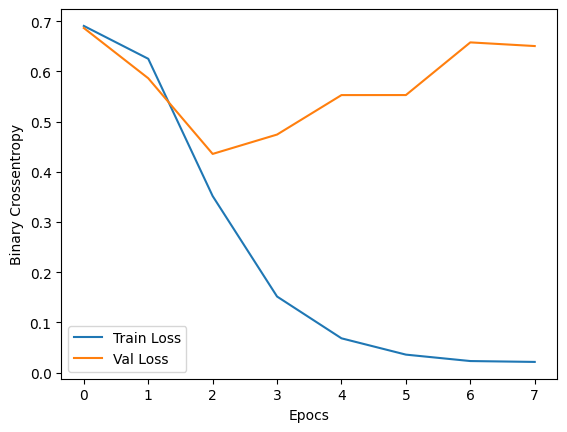

In [22]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label = 'Train Loss')
plt.plot(hist.history['val_loss'],label = 'Val Loss')
plt.xlabel('Epocs')
plt.ylabel('Binary Crossentropy')
plt.legend()
plt.show()

#### model is facing overfitting 

### Evaluate the model

In [23]:
## results in training
model.evaluate(xtrain,ytrain)

25/25 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 0.9425


[0.1376686841249466, 0.9424999952316284]

In [24]:
### Results in Testing

model.evaluate(xtest,ytest)

7/7 [==============================] - 0s 2ms/step - loss: 0.7206 - accuracy: 0.7150


[0.7206337451934814, 0.7149999737739563]

### Evaluate the model using confusion metrix

In [25]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

7/7 [==============================] - 0s 3ms/step


In [26]:
yprob_ts[:5]

array([[0.1285569 ],
       [0.00259293],
       [0.9845286 ],
       [0.9996608 ],
       [0.99987113]], dtype=float32)

In [27]:
yprob_tr[:5]

array([[9.7690588e-01],
       [9.9995089e-01],
       [9.9999857e-01],
       [3.6272038e-05],
       [2.6326670e-04]], dtype=float32)

### Get the preditions from probability

In [28]:
ypred_tr = [1 if i>=0.5 else 0 for i in yprob_tr]
ypred_ts  = [1 if i>=0.5 else 0 for i in yprob_ts]

In [29]:
ypred_tr[:5]

[1, 1, 1, 0, 0]

In [30]:
ytrain.head(5)

108    1
134    1
585    1
42     0
990    0
Name: Liked, dtype: int64

In [31]:
ypred_ts[:5]

[0, 0, 1, 1, 1]

In [32]:
ytest.head(5)

492    0
383    0
856    1
834    1
603    1
Name: Liked, dtype: int64

### Create confusion metrix

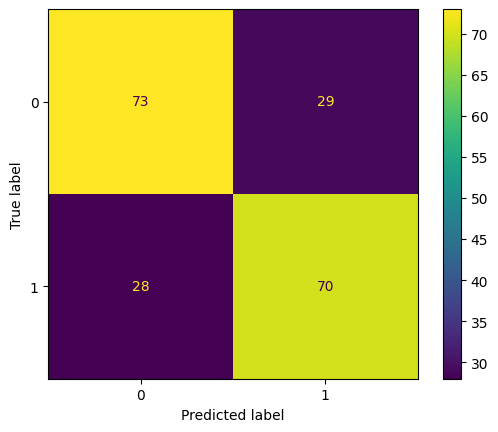

In [33]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Print the clssification

In [34]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       102
           1       0.71      0.71      0.71        98

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.72      0.71      0.72       200



### Save the model for future use

In [35]:
model.save('sentimentAnalysis.keras')

### Predicting own statement

In [38]:
def pred_statement(st,tfidf,model):
    pre = text_preprocess(st)
    pre_tf = tfidf.transform([pre]).toarray()
    pred = model.predict(pre_tf)
    if pred >=0.5:
        print('Positive Statement')
    else:
        print('Negative Statement')


In [46]:
st = 'great!!!!'
pred_statement(st,tfidf,model)

1/1 [==============================] - 0s 261ms/step
Positive Statement
